Geo Data Science with Python,
Prof. Susanna Werth, VT Geosciences

---
### Reading - Lecture 9

# Python Modules

This lesson discusses the use and creation of Python **modules**. 

### Sources

This lesson is inspired by Lessons 4 of the [Geo-Python 2018](https://geo-python.github.io/site/2018/notebooks/L4/modules.html), which is licensed under a Creative Commons Attribution-ShareAlike 4.0 International licence. The later part of this lesson is adapted from [How To Write Modules in Python 3](https://www.digitalocean.com/community/tutorials/how-to-write-modules-in-python-3) from the [Digital Ocean Community](https://www.digitalocean.com/community), which is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.


---


# Loading and using modules

Optional reading material on this topic: chapter *Modules: The Big Picture* from Lutz (2013).

## What is a module?

A *module* in Python is simply a Python `.py` file that contains a list of related functions that can be loaded and used. In Python's conceptual hierarchy **modules are the highest-level organization units that package code for reuse.**
Modules are similar to what are more generally called libraries in programming languages, which again contain code related to a specific task such as mathematical operations. 
There are a *HUGE* number of Python modules, and many of them greatly extend what can be done in a normal Python program.
In fact, the abundance of free Python modules is one of the best reasons to learn and start using Python.

## How can modules be loaded?

Python modules can be loaded in a number of different ways.

### Loading a module
    
Let's start simple with the math module. We have used it briefly before. Now we will discuss how this actually worked.
Here, we’ll load the math module using the `import` statement.

In [5]:
import math

Here we have loaded the math module by typing `import math`, which tells Python to read in the functions in the math module and make them available for use.

## How to access module's content?

To call attributes, methods or functions of a module, simply use the **dot notation** as following: `modulename.functionname()`. 
Yes, it is that simple:

In [6]:
math.sqrt(81)

9.0

In our example, we see that we can use a function within the math library by typing the name of the module first, a **period** or **dot operator**, and then the name of function we would like to use afterward (e.g., `math.sqrt()`).

Note: Built-in functions such as `print()` do not require the name of a module, since these functions are part of the built-in namespace and they do not need to be imported.

Variables that are defined in the module can be accessed the same way. For example, the math module defines the natural constant `pi`:

In [7]:
math.pi

3.141592653589793

### Renaming imported modules

We can also rename modules when they are imported.
This can be helpful when using modules with longer names.

In [4]:
import math as m

In [5]:
m.sqrt(49)

7.0

In [6]:
type(m)

module

In this example we now see that when the math module is imported, it is imported to be usable with the name `m` instead of `math`.
It doesn't matter much in our toy example here since math is not a long module name, but we will see other examples later in the course where renaming the modules is very helpful (e.g., matplotlib).


### Importing a single function

It is also possible to import only a single function from a module, rather than the entire module.
This is sometimes useful when using large modules that have much more available than the desired use.

In [7]:
from math import sqrt

In [8]:
sqrt(121)

11.0

Though this can be useful, it has the drawback that the imported function could conflict with other built-in or imported function names, and you lose the information about which module contains the function.
You should only do this when you truly need to.

### Importing part of a module

Some modules have sub-modules that can also be imported without importing the entire module.
We may see examples of this later when making data plots using the pyplot sub-module of the [Matplotlib module](http://matplotlib.org/).
In case you're curious, here is an example.

In [2]:
import matplotlib.pyplot as plt

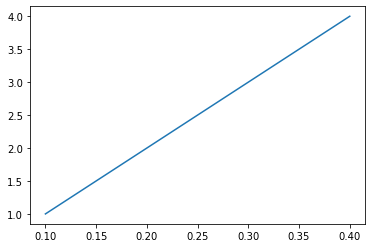

In [3]:
plt.figure()
plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
plt.show()

This creates a new figure window for a pyplot figure.
We will work more with this package soon.

## Namespace of modules

If you do not know the names of all of the functions in a given module, or which are part of a module, you can view the list of functions that are part of a module by using the `dir()` function. If you pass the name of a module as an argument, you receive all names that exist in that module, including it's functions.

In [8]:
print(dir(math))

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'comb', 'copysign', 'cos', 'cosh', 'degrees', 'dist', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'isqrt', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'perm', 'pi', 'pow', 'prod', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']


Given this list of names in the module `math`, you can also look up their content. For example, the name `__name__` is an attribute that saves the name of the module. And `__file__` contains the location of the math module file.

The names with **double trailing and leading underscores** are **built-in attributes**, that are defined for all modules:

Table 1: *Python module's Built-in Attribute Names and their Content*

| Built-in Attribute Name |  Content|
|:-:| :- |
| `__name__`		| Module name|
| `__file__`		| Full name of the module file|
| `__doc__`		| Documentation string|
| `__package__`	| Package name, empty for top-level module|

Let's peak into the content of these built-in attributes for the module math:

In [12]:
import math
print("math.__name__ returns: ", math.__name__)
print("math.__file__ returns: ", math.__file__)
print("math.__doc__  returns: ", math.__doc__)

math.__name__ returns:  math
math.__file__ returns:  /anaconda3/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so
math.__doc__  returns:  This module provides access to the mathematical functions
defined by the C standard.


Most of the other names returned by `dir(math)` are functions of the module math.

So that's helpful, but what about when you don't know what a given function does?
The easiest solution is to use the `help()` function.

In [13]:
help(math.sin)

Help on built-in function sin in module math:

sin(x, /)
    Return the sine of x (measured in radians).



(Note that you'll need to press `q` to exit the help viewer in a terminal or command window.)

## What should I not do?

Here are a few things to avoid.

### from X import *

Don't use `from X import *`.
This may be easier to understand by way of an example, but assuming `X` above is a Python module, `from X import *` will import all of the functions in module X and then using them without referencing the module with the `.` operator.
Though you might think this is helpful. But it is more likely to encounter conflicting names when using `from X import *`. That means you risk overwriting any existing variables, attributes or functions living in your current namespace. Therefore, it is much better to simply `import X` or `import X as Y` to keep the connection between the functions and their module.

### Poor names when renaming on import

Don't use confusing names when renaming on import.
Be smart when you import modules.
If you want to make the module name shorter on import, pick a reasonable abbreviation.
For instance, `import matplotlib as m` could be confusing, especially if you're also using `import math as m` in other Jupyter notebooks or script files.
Similarly, `import matplotlib as math` is perfectly OK syntax in Python, but bound to cause a world of trouble.
Remember, people need to be able to read and understand the code you write, keep it simple and logical.

# Writing your own Module

Modules can contain definitions of functions, classes, and variables that can then be utilized in other Python programs. Some modules are available through the Python Standard Library and are therefore installed with your Python installation. Others can be installed with a Python package manager (e.g. conda or pip, see below).

Additionally, you can create your own Python modules since modules are comprised of Python .py files. This means, creating a new *.py*-files that package our own library of functions. This will allow you to import and use them in any Python interpreter, e.g. that of the jupyter Notebook, as well as within other programming files. 

So let's begin with a very simple example. We want to write a Python module `hello`, which contains one function of the name `world` that simply prints the string "Hello, World!" to the screen, like this:

```python
def world():
    print("Hello, World!")
```

We will leave out any other fancy code elements, like parameter passing, user input, file reading etc and just focus on how to create our own module. Later you can use this recipe to package more complex code. 

**Go to the file browser of the JupyterHub, create a new textfile of the name `hello.py` and copy the function above into that file. Save and close it.**

If you run the program on the command line with python hello.py nothing will happen since we have not told the program to do anything. It just defines a function. If you now try to run the function in the command cell below, you will receive a `NameError`, because the function is not defined in this environment.

In [10]:
# world()  # uncomment this line to test it

If you want to use the function `world()` that is defined in the file `hello.py`, you have to look at the file as a module that packages the function. Now, it should get more clear, what we have to do?! Yes, import the module! Then we can access the function, by referencing it with the module name and the `.` operator:

In [15]:
import hello
hello.world()

ModuleNotFoundError: No module named 'hello'

Congratulations, you have just successfully written your first own Python module.

Note: if you store the module file in another folder, you can use the built-in module sys to tell the Python interpreter to look for the module in that path. For that assing the entire path as a string to the variable `pathHere`, below and uncomment the lines importing the `sys` module and appending the path to the `path` attribute of `sys`:

In [11]:
# is necessary, tell python where to look for modules via sys.path
# pathHere = 'ADD YOUR PATH HERE'
# import sys
# sys.path.append(pathHere)

You can also further expand your module with more variables or  functions. For example, request the name of a user through `input()` and then print `Hello <name>!` on the screen! If you need some inspiration, refer back to the previous notebook lesson on functions. Copy some of the functions into the `hello.py` file and then practice accessing the functions through the module import and referencing.

More details on writing modules can be found on the following page: https://www.digitalocean.com/community/tutorials/how-to-write-modules-in-python-3.

# Script or module file? Using `main()` as a Function

Many programming languages (like C++ and Java) require a `main()` function in the script file in order to execute. 
In Python, it is not required to include such a `main()` function, since you can call a function from your script file and it will run (as we have done in the examples above). However, including such a function can structure our Python programs in a logical way that puts the most important components of the program into one function. It can also make our programs easier for non-Python programmers to read. 

So let's do that now for our script file ` hello.py`, that we have created above.

Within the `main()` function, let move the  include a `print()` statement to indicate at what point the `main()` function is called during the script execution:

```python
def main():
    print("This is the main function.")
```

Further below, after defining the `main()` in the script file, we’ll call the `main()` function. Copy and paste the following code to the bottom of your script file `hello.py` (leave no intent for the `main()` function call). Make sure to save the file afterwards.

```python
main()
```

All together, the bottom of your script (below the function `hello()` should look like this:

```python
def main():
    print("This is the main function.")
    
main()
```

Make sure to save the script file, then you can execute it as program here in the notebbok, using the magic command. Let's see what we get: 

In [19]:
%run hello_final.py

The meaning of Life


Because we entered the print statement within the function `main()` and then called `main()` to run, you should see the sentence `This is the main function.` printed out to the screen.

The fact this sentence is printed **indicates to us the main function was executed**.

Now, let's add something else:

In Python, '__main__' is the name of the scope where top-level code will execute. When a program is run from standard input, like a script, or from an interactive prompt, its __name__ is set equal to '__main__'.

Because of this, there is a convention to use the following construction at the bottom of a script file:

```python
if __name__ == '__main__':
    # Code to run when this is the main program here
    # ...
```

This construction at the bottom of script files lets them be used, either:

* as the main program and **run** what follows the `if __main__...` statement, or
* as a module and **not run** what follows the `if __main__...` statement.

If you’re using your program file as a module, the code in the `if __main__...` statement will not be executed. (However, any code that is not in this statement will be executes upon its import as a module). 

This all may sound a bit cryptic at the moment, so let’s test it out to see what happens. Let's expand on our `hello.py` script a bit more to incorporate such an `if __main__...` statement. 

We’ll add the `if __name__ == '__main__':` construction at the bottom of the file. For our purposes, since we have put all the functions we would like to run in a `main()` function, we’ll call the `main()` function following this the `if __main__...` statement, like this:

```python
if __name__ == '__main__':
    # Code to run when this is the main program:
    main()
```

To make sure, nothing is mixed up: Check that your file has the same content as the code cell below. We are providing the entire file content, as it should be by now, and we add a very brief header at the top: 

```python
# Program hello.py

def main():
    print("This is the main function.")
    
if __name__ == '__main__': main()
    # Code to run when this is the main program here
 ```

Now, take some time to add some comments throughout the script file, to document the content add any function or variables, or comments. 

After that, let's again run the script, which is a complete program by now:

In [22]:
%run hello.py

This is the main function.


You should get the same output as we had before.

But now, the script can also be used in a **modular way** without modification (or without duplicating it into another format). That means, we can again import the file as module, either from **any other program file**, where we might need it, or right here. Let's import the script again as module using the acronym `ho` for import: 

In [23]:
import hello as ho

Now, you can see, that importing the module, does not execute the code witin the `if __main__...` statement. After the import, we can now use any attributes, functions or variables that you have added to the file.

If needed, however, you could also call the main function as part of the module `hello` (which is sourcing from our script file `hello.py`).

In [25]:
ho.main()

This is the main function.


In our example, calling the `main()` function from the module `hello` gives you the same output as executing the respective script file, since the `main()` function is exactly what is exectuted in the latter case.

To conclude, using `main()` as a function and the `if __main__...` statement at the bottom of your script files can organize your code in a logical way. The script (program) is now is more organized, making it more readable and modular.

If you like to read more about the background of the `if __main__...` statement, visit the [related Python documentation pages](https://docs.python.org/3.7/library/__main__.html) or this [discussion board of stackoverflow.com](https://stackoverflow.com/questions/419163/what-does-if-name-main-do#419185) may be very helpful.

Note: If you do not want to declare a `main()` function in your program `hello.py`, you could also directly add the content of the `main()` function into the `if __main__...` statement. In this case, the module would not contain a `main()` function, and it is after all, optional to include it. However, you will very regularily find content inside the `if __main__...` statement in Python programs.

## Add a docstring and comments to your script file!

To add a docstring to your script or module file, simply add a comment block at the top of the file like this:

In [26]:
"""This is a docstring at the top of my file"""

'This is a docstring at the top of my file'

The docstring will be stored in the built-in attribute `__doc__`. Also don't forget to be generous with commenting your code!

# Conlusion

Writing a Python module is the same as writing any other Python .py script file or program file. This notebook covered how to import and use Python modules and how to write your own module file content and how to use the module file in the form a Python program/script file. 

<div class="alert alert-success">

**What is the difference between modules and scripts/programs?**

The term Python module is used to describe any `.py` file containing Python code. A Python **module** packages a number of objects, which may be variables, functions and also **classes**, that package data and/or algorithms into Python code.
    
A **program** or **script** would typically organize an entire data analysis progem, including reading of input data (from file, keyboard or any other device), complex algorithms that process the data and write results to output.
    
However, both programs and modules may also import other modules, define global variables and contain a `main()` function. Objects defined in a program can be imported as a module without modifications, if the program is structured correctly.

</div>

# Standard Python Modules

Let's briefly discuss a few standard modules of Python. Standard modules come with the installation of the Python compiler on a computer (or a server like the JupyterHub). They do not require any extra installation and simply have to be imported, using the `import` statement. The Python documentation are very recourceful for information on standard modules. For example, ther you can find a [Python Module Index](https://docs.python.org/3/py-modindex.html). Below a brief overview of the most commonly used standard modules (there are about 200 of them).

Table 2: *Commonly Used Python Standard Library Modules*

| Module | Description| Example|
| :-: | :- | :- |
|math|Floating point math functions|math.pow()
|string|constants and variables for processing strings (most available as methods)|string.capwords()
|os|Interactions with the operating system|os.system(command)
|sys|Interpreter-related tools|sys.path, sys.exit()
|shutil|High-level file operations|shutil.copyfile(), shutil.move()
|re|Regular expression pattern matching tools for advanced string processing|re.match(‘c’, ‘abcdef’)


We have already imported the math module above and used its function `sqrt()`. The module widely expands Pythons built-in functions for numbers. A complete list of functions in the math module can be found on the [Python's documentation pages for the module math](https://docs.python.org/3/library/math.html).

The module `string` contains some constants, utility function, and classes for string manipulation. Look up some examples in the [Python's documentation pages for the module string](https://docs.python.org/3/library/string.html#module-string).

The Python module `os` provides various operating system interfaces and it contains also more sophisticated functions for file handling, including `rename()`, `remove()`, `mkdir()`, `chdir()` or `rmdir()`. Study syntax for the methods of the os module for file handling on the second half of this website: https://www.tutorialspoint.com/python/python_files_io.htm. 

Even more sophisticated file operations are packaged in the module [`shutil`](https://docs.python.org/3/library/shutil.html?highlight=shutil#module-shutil).

The `sys` module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. For example, the function `sys.path()` provides you a list of folders, where the Python interpreter searches for module files. And the function `sys.path.append()` can add paths to this list.

The package `importlib` handles everything related to module import. It also provides the function `.reload()`, which reloads a previously imported module. The argument must be a module object, so it must have been successfully imported before. For example:

In [9]:
import importlib
importlib.reload(math)

<module 'math' from '/opt/anaconda3/lib/python3.8/lib-dynload/math.cpython-38-darwin.so'>

This is useful if you have edited the module source file using an external editor and want to try out the new version without leaving the Python interpreter. 

# Third-party Python Modules

Third-party modules are non-standard in the sense that they are not maintained and supported by the [Python Software Foundation](https://en.wikipedia.org/wiki/Python_Software_Foundation), a nonprofit organization devoted to the Python programming language. 

Some of these libraries, however, have become so important, nowadays they come with a python installation. Examples for that are the packages **NumPy**, **Matplotlib** and **Pandas**, which we will discussin the upcoming notebooks. 


On this JupyterHub, we have separately installed the modules geopandas, shapely, cartopy and netCDF4 relying on the anaconda distribution. However these are just a few examples for a vast universe of open-source Python libraries. Below a brief overview of larger Python packages for data sciences and GIS applications that might be relevant to you now or in the future. 

Table 3: *Larger Third-party Python Modules*

| Module Package | Brief Description |
| :-: | :- |
|[IPython](https://ipython.org/) | Python prompt on steroids, fundament of Jupyter Notebooks|
|[NumPy](https://numpy.org/)   | Advance math functionalities, matrix operations|
|[Matplotlib](https://matplotlib.org/) | Numerical 2D plotting library|
|[Cartopy](https://pypi.org/project/Cartopy/)   | Drawing maps for data analysis and visualisation.|
|[Pandas](https://pandas.pydata.org/) | High-performance data structures and data analysis tools|
|[GeoPandas](http://geopandas.org/) | Pandas data structures for geospatial applications |
|[SciPy](https://www.scipy.org/)   | Library of algorithms and mathematical tools|
|[Scikit-learn](http://scikit-learn.org/) | Classification, regression and clustering algorithms, machine Learning, interoperates with NumPy and SciPy|
|[Statsmodels](https://www.statsmodels.org/)   | Classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.|
|[TensorFlow](https://www.tensorflow.org/learn) | Implementation of neural networks|
|[Keras](https://keras.io/) | Creating deep learning models, specifically neural networks, builts on TensorFlow and Theano.|
|[netcdf4](http://unidata.github.io/netcdf4-python/) | Python interface to the netCDF C library.|
|[pywavelets](https://pywavelets.readthedocs.io/) | Wavelet transform software.|
|[pydap](https://www.pydap.org) | Implementing the Data Access Protocol, also known as DODS or OPeNDAP.|
|[ArcPy](https://desktop.arcgis.com/en/arcmap/10.3/analyze/arcpy/what-is-arcpy-.htm) | ArcGIS geographic data analyses, map automation, ...|

The list is far from complete. In the following notebooks, we will discuss the packages NumPy, Matplotlib, Pandas and more.

The three packages NumPy, Matplotlib and Pandas are very useful in any kind of data sciences and for data processing. During the upcoming notebooks, you will be introducted to all three. We also want to recommend to check the **Python Data Science Handbook** by Jake VanderPlas  (2017). This book is entirely written as Jupyter Notebooks, which are published with an open source license. Click on the book's cover image below to access them. (You can also download them on [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook) and from there launch them on Google Colab or Binder.)

[</div>
<img src="Image_PDSH-cover.png" title="Python Data Science Handbook by Jake VanderPlas" width="100" />](https://jakevdp.github.io/PythonDataScienceHandbook/)

If you are interested getting an overview of more useful Python packages check-out these online articles:

* [Python Wiki - Useful Modules, Packages and Libraries](https://wiki.python.org/moin/UsefulModules)
* [Top 10 Python Libraries You Must Know In 2021](https://www.edureka.co/blog/python-libraries/)


# Installing Python Packages
Many more available modules exist, that have to be installed before using them. There is not enough time in this course to provide you with an extensive tutorial on that. However, if you have anaconda on your computer, it is wise to install new packages through the Anaconda application. 

* [Anaconda Distribution (anaconda)](https://www.anaconda.com/distribution/): An alternative Python open-source package library, provided by the software development company [Anaconda, Inc](https://en.wikipedia.org/wiki/Anaconda_(Python_distribution)).

If a package is not available there, you can install it via the command line  through conda, to ensure compatibility.
* [Conda project page and documentation](https://conda.io/projects/conda/en/latest/user-guide/install/index.html): Open-source package management system and environment management system that runs on Windows, macOS, and Linux

Only if you installed Python using pip, install further packages to your computer using that same package library. Mixed installations through conda and pip may result in software package conflicts.

* [Pythons documentation pages on installing packages](https://packaging.python.org/tutorials/installing-packages/): Basics of how to install Python using pip.
* [Python Package Index (pip)](https://pypi.org/): A open-source Python package library provided by the Python Software Foundation.